# DeepLabCut Toolbox - DEMO (mouse reaching)
https://github.com/AlexEMG/DeepLabCut

Nath\*, Mathis\* et al. *Using DeepLabCut for markerless pose estimation during behavior across species*, (under revision).

This notebook demonstrates the use of the DeepLabCut toolbox for a provided demo dataset based on *Somatosensory Cortex Plays an Essential Role in Forelimb Motor Adaptation in Mice* by Mathis et al., **Neuron 2017**. DOI:https://doi.org/10.1016/j.neuron.2017.02.049

This notebook illustrates how to:
- plot the labeled images
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video 
- plot the trajectories 
- identify outlier frames
- annotate the outlier frames manually
- merge the data sets and update the training set
- train a network

Note: This notebook starts from an already initialized project with labeled data.

 Note: The noteboks will not work in Docker, as Docker is designed to not display GUIs. Please follow the steps outlined here: https://github.com/AlexEMG/DeepLabCutbeta/blob/master/docs/UseOverviewGuide.md#option-2-using-terminal-start-python

# Not in Colab or Docker, great, then start here!

First, be sure you are in the Anaconda Python! Go to "Kernel > Change Kernel > and selection Python [conda enc: DLC2]" (or whatever you call your conda environment!

In [1]:
# Importing the toolbox (takes several seconds)
import deeplabcut

In [2]:
import tensorflow as tf
tf.__version__

'1.8.0'

In [3]:
# Loading example data set 
import os
# Note that parameters of this project can be seen at: *Reaching-Mackenzie-2018-08-30/config.yaml*
from pathlib import Path
path_config_file = os.path.join(os.getcwd(),'Reaching-Mackenzie-2018-08-30/config.yaml')
deeplabcut.load_demo_data(path_config_file)

Loaded, now creating training data...
/home/mackenzie/DEEPLABCUT/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30  already exists!
/home/mackenzie/DEEPLABCUT/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1  already exists!
/home/mackenzie/DEEPLABCUT/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1//train  already exists!
/home/mackenzie/DEEPLABCUT/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1//test  already exists!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


In [4]:
#Perhaps plot the labels to see how the frames were annotated:
deeplabcut.check_labels(path_config_file)

Creating images with labels by Mackenzie.
/home/mackenzie/DEEPLABCUT/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/labeled-data/reachingvideo1_labeled  already exists!
They are stored in the following folder: /home/mackenzie/DEEPLABCUT/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/labeled-data/reachingvideo1_labeled.
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


*Note: the training set was already created, so you don't need to do this and can directly proceed to train the network!*

## Start training of Feature Detectors
This function trains the network for a specific shuffle of the training dataset. **The user can set various parameters in /Reaching-Mackenzie-2018-08-30/dlc-models/ReachingAug30-trainset95shuffle1/iteration-0/train/pose_cfg.yaml.**

Training can be stopped at any time. Note that the weights are only stored every 'save_iters' steps. For this demo the it is advisable to store & display the progress very often (i.e. display every 20, save every 100). In practice this is inefficient.  **Go change the pose_cfg file now!**

In [8]:
deeplabcut.train_network(path_config_file, shuffle=1)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['hand', 'Finger1', 'Finger2', 'Joystick'],
 'batch_size': 1,
 'crop': False,
 'crop_pad': 0,
 'cropratio': 0.25,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 20,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'h1': 400,
 'h2': 400,
 'init_weights': '/home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1000,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Documentation_data-Reaching_95shuffle1.pickle',
 'minsize': 100,
 'mirror': Fal

INFO:tensorflow:Restoring parameters from /home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt


Restoring parameters from /home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt
Restoring parameters from /home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt
Restoring parameters from /home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt
iteration: 20 loss: 0.1824 lr: 0.005
iteration: 20 loss: 0.1824 lr: 0.005
iteration: 20 loss: 0.1824 lr: 0.005
iteration: 40 loss: 0.0384 lr: 0.005
iteration: 40 loss: 0.0384 lr: 0.005
iteration: 40 loss: 0.0384 lr: 0.005
iteration: 60 loss: 0.0335 lr: 0.005
iteration: 60 loss: 0.0335 lr: 0.005
iteration: 60 loss: 0.0335 lr: 0.005
iteration: 80 loss: 0.0283 lr: 0.005
iteration: 80 loss: 0.0283 lr: 0.005
iteration: 80 loss: 0.0283 lr: 0.005
iteration: 100 loss: 0.0297 lr: 0.005
iteration: 100 loss: 0.029

KeyboardInterrupt: 

*Note, that if it reaches the end, you stop it (by "stop" or by CTRL+C), 
you will see an "error", but it is not a real error, i.e. you can ignore this.*

## Evaluate a trained network

This function evaluates a trained model for a specific shuffle/shuffles at a particular training state (snapshot) or on all the states. The network is evaluated on the data set (images) and stores the results as .csv file in a subdirectory under **evaluation-results**.

You can change various parameters in the ```config.yaml``` file of this project. For evaluation all the model descriptors (Task, TrainingFraction, Date etc.) are important. For the evaluation one can change pcutoff. This cutoff also influences how likely estimated postions need to be so that they are shown in the plots. One can furthermore, change the colormap and dotsize for those graphs.

In [9]:
deeplabcut.evaluate_network(path_config_file,plotting=True)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['hand', 'Finger1', 'Finger2', 'Joystick'],
 'batch_size': 1,
 'crop': False,
 'crop_pad': 0,
 'cropratio': 0.25,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 20,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'h1': 400,
 'h2': 400,
 'init_weights': '/home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1000,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Documentation_data-Reaching_95shuffle1.pickle',
 'minsize': 100,
 'mirror': Fal

/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/evaluation-results/  already exists!
/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/evaluation-results/iteration-0/ReachingAug30-trainset95shuffle1  already exists!
Running  DeepCut_resnet50_ReachingAug30shuffle1_100  with # of trainingiterations: 100
INFO:tensorflow:Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-100


Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-100
Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-100
Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-100
0it [00:00, ?it/s]

Analyzing data...


20it [00:18,  1.08it/s]
Could not load matplotlib icon: can't use "pyimage361" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage361" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage361" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage370" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage370" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage370" as iconphoto: not a photo image


Done and results stored for snapshot:  snapshot-100
Results for 100  training iterations: 95 1 train error: 60.31 pixels. Test error: 17.01  pixels.
With pcutoff of 0.1  train error: 60.31 pixels. Test error: 17.01 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


Could not load matplotlib icon: can't use "pyimage379" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage379" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage379" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage388" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage388" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage388" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage397" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage397" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage397" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage406" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage406" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "

Could not load matplotlib icon: can't use "pyimage658" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage667" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage667" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage667" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage676" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage676" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage676" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage685" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage685" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage685" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "pyimage694" as iconphoto: not a photo image
Could not load matplotlib icon: can't use "

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


*NOTE: depending on your set up sometimes you get some "matplotlib errors, but these are not important*

Now you can go check out the images. Given the limted data input and it took ~20 mins to test this out, it is not meant to track well, so don't be alarmed. This is just to get you familiar with the workflow... 

## Analyzing videos
This function extracts the pose based on a trained network from videos. The user can choose the trained network - by default the most recent snapshot is used to analyse the videos. However, the user can also specify the snapshot index for the variable **snapshotindex** in the **config.yaml** file).

The results are stored in hd5 file in the same directory, where the video resides. The pose array (pose vs. frame index) can also be exported as csv file (set flag to...). 

In [17]:
# Creating video path
# You'll need to edit this! 

videofile_path = '/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi'
                                                     

In [18]:
print("Start Analyzing the video!")
deeplabcut.analyze_videos(path_config_file,[videofile_path])

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['hand', 'Finger1', 'Finger2', 'Joystick'],
 'batch_size': 1,
 'crop': False,
 'crop_pad': 0,
 'cropratio': 0.25,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 20,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'h1': 400,
 'h2': 400,
 'init_weights': '/home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1000,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Documentation_data-Reaching_95shuffle1.pickle',
 'minsize': 100,
 'mirror': Fal

Start Analyzing the video!
Using snapshot-100 for model /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1
INFO:tensorflow:Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-100


Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-100
Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-100
Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot-100


/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi
Starting %  /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi
Loading  /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi


  0%|          | 0/266 [00:00<?, ?it/s]

Duration of video [s]:  8.53 , recorded with  30.0 fps!
Overall # of frames:  266 with cropped frame dimensions:  [840, 743]
Starting to extract posture
Starting to extract posture


 96%|█████████▌| 256/266 [07:38<00:17,  1.79s/it]/home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/moviepy/video/io/ffmpeg_reader.py:130: UserWarning: Warning: in file /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi, 1872360 bytes wanted but 0 bytes read,at frame 1/256, at time 0.03/8.53 sec. Using the last valid frame instead.
  UserWarning)

/home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/moviepy/video/io/ffmpeg_reader.py:130: UserWarning: Warning: in file /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi, 1872360 bytes wanted but 0 bytes read,at frame 1/256, at time 0.03/8.53 sec. Using the last valid frame instead.
  UserWarning)

/home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/moviepy/video/io/ffmpeg_reader.py:130: UserWarning: Warning: in file /home/mackenzie/DEEPLABCUT/D

Detected frames:  256
Saving results in /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


*NOTE: Yes, this is slow on a CPU (a GPU is MUCH faster)... see https://www.biorxiv.org/content/early/2018/10/30/457242 if you are interested!*

## Create labeled video

This function is for the visualization purpose and can be used to create a video in .mp4 format with the predicted labels. This video is saved in the same directory, where the (unlabeled) video resides. 

Various parameters can be set with regard to the colormap and the dotsize. The parameters of the 

In [19]:
deeplabcut.create_labeled_video(path_config_file,[videofile_path])

Starting %  /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos ['/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi']
Loading  /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi and data.
{'data': {'start': 1541105409.8062403, 'stop': 1541105868.0542192, 'run_duration': 458.24797892570496, 'Scorer': 'DeepCut_resnet50_ReachingAug30shuffle1_100', 'config file': {'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/test/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref


  0%|          | 1/256 [00:00<00:31,  8.03it/s]

Duration of video [s]:  8.533333333333333 , recorded with  30.0 fps!
Overall # of frames:  256 with cropped frame dimensions:  743 840
Generating frames and creating video.



100%|██████████| 256/256 [00:05<00:00, 50.21it/s]

## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color. The underlying functions can easily be customized.

/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi
Starting %  /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos ['/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi']
/home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos  already exists!
Loading  /home/mackenzie/DEEPLABCUT/DeepLabCutbeta/examples/Reaching-Mackenzie-2018-08-30/videos/MovieS2_Perturbation_noLaser_compressed.avi and data.


<IPython.core.display.Javascript object>


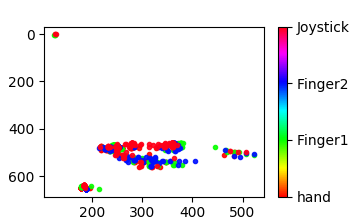

<IPython.core.display.Javascript object>


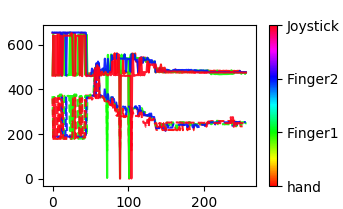

<IPython.core.display.Javascript object>


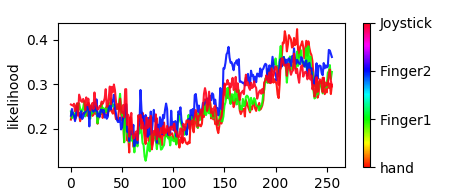

<IPython.core.display.Javascript object>


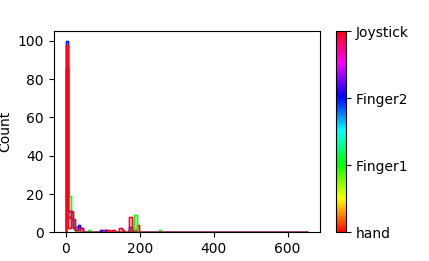

Plots created! Please check the directory "plot-poses" within the video directory


In [20]:
%matplotlib notebook
deeplabcut.plot_trajectories(path_config_file,[videofile_path],showfigures=True)

#These plots can are interactive and can be customized (see https://matplotlib.org/)

## Extract outlier frames, where the predictions are off.

This is optional step allows to add more training data when the evaluation results are poor. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

In [ ]:
deeplabcut.extract_outlier_frames(path_config_file,[videofile_path],outlieralgorithm='uncertain',p_bound=.2)

In [ ]:
# Note, if you have questions on parameters, remember "?" gives you answers:
# i.e. deeplabcut.extract_outlier_frames?

The user can run this iteratively, and (even) extract additional frames from the same video.

## Manually correct labels

This step allows the user to correct the labels in the extracted frames. Navigate to the folder corresponding to the video 'MovieS2_Perturbation_noLaser_compressed' and use the GUI as described in the protocol to update the labels.

In [ ]:
#GUI pops up! 

%gui wx
deeplabcut.refine_labels(path_config_file)

In [ ]:
# Now merge datasets (once you refined all frames)
deeplabcut.merge_datasets(path_config_file)

## Create a new iteration of training dataset, check it and train...

Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

In [ ]:
deeplabcut.create_training_dataset(path_config_file)

In [ ]:
#Perhaps plot the labels to see how how all the frames are annoted (including the refined ones)
deeplabcut.check_labels(path_config_file)

Now one can train the network again... (with the expanded data set)

In [ ]:
deeplabcut.train_network(path_config_file, shuffle=1)